# Assume a population has three statuses, A,B, and C. Set a transition matrix M that moves some fraction of each status to other statuses. Simulate the change of fraction per status.

初期状態をinit.Sとする。  
まずはじめにA状態の人が7割、B状態の人が2割、C状態の人が1割とする。

In [1]:
init.S<-c(0.8,0.2,0.1)
init.S

[1] 0.8 0.2 0.1

状態Aから1-pの確率で状態Bに移り、状態Bから1-qの確率で状態Cに移り、状態cから1-qの確率で状態Aに移るモデルを考えると、  
transition matrix Mは、
$$
M= \begin{pmatrix} p & 0 & 1-r \\ 1-p & q & 0 \\ 0 & 1-q & r  \end{pmatrix}
$$

今、p=0.9, q=0.7, r=0.2とすると、

In [2]:
p<-0.9
q<-0.7
r<-0.2
M<-matrix(c(p,(1-p),0,0,q,(1-q),(1-r),0,r),3,3)
M

0.9,0.0,0.8
0.1,0.7,0.0
0.0,0.3,0.2


次の状態s2は、

In [3]:
s2<-M%*%init.S
s2

0.80
0.22
0.08


さらに次の状態s3は、

In [4]:
s3<-M%*%s2
s3

0.784
0.234
0.082


状態Snがどのように推移していくかプロットしてみる

In [5]:
init.S<-c(0.8,0.2,0.1)
n<-100
Sn<-matrix(0,n,3)
Sn[1,]<-init.S
for(i in 2:n)
Sn[i,]<-M%*%Sn[i-1,]

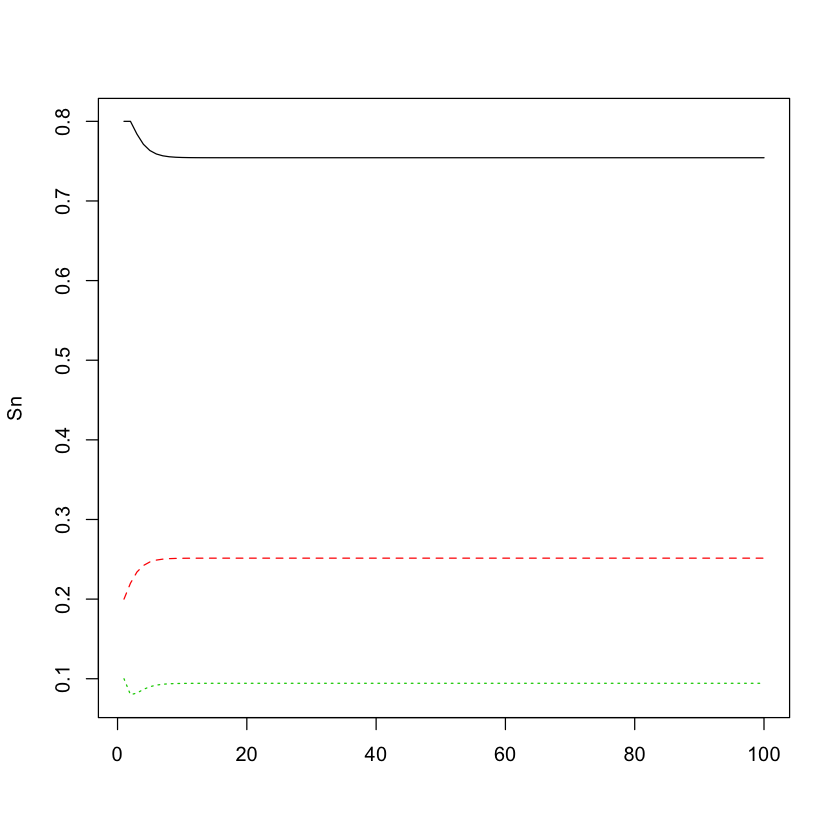

In [7]:
matplot(Sn,type="l")

In [8]:
Sn[n,]

[1] 0.75428571 0.25142857 0.09428571

このようにいずれ定常状態（A:75.4%、B:25.1%、C:9.4%）に落ち着く。

# Draw a graph whose nodes are statuses and edges are transition among them. Make the size of vertices proportional to the fraction in the population at a particular point. Make the width of edges proportional to the probability in transition.

In [9]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



まずエッジリストを作成する。

In [10]:
el<-matrix(c("A","A","B","B","C","C","A","B","B","C","C","A"),6,2)
el

A,A
A,B
B,B
B,C
C,C
C,A


エッジリストからグラフを書く。

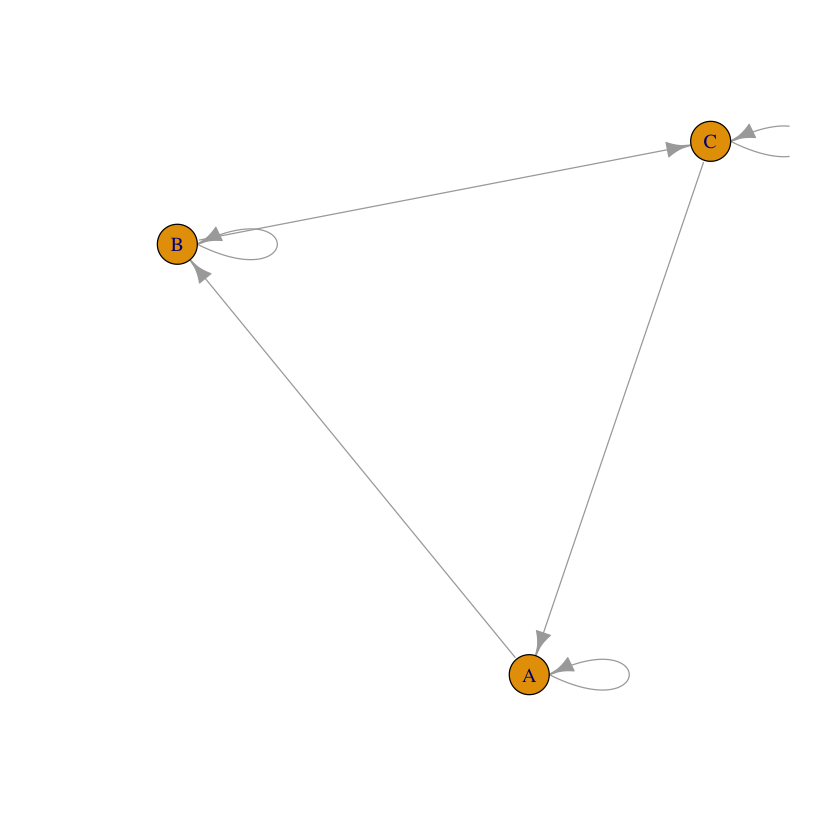

In [11]:
g<-graph.edgelist(el)
plot(g)

移行確率に応じてエッジに重みをつける。

In [12]:
g.el<-graph.edgelist(el,directed=FALSE)
E(g.el)

+ 6/6 edges from 17a6075 (vertex names):
[1] A--A A--B B--B B--C C--C A--C

In [13]:
E(g.el)$weight <- c(p,1-p,q,1-q,r,1-r)
E(g.el)$weight 

[1] 0.9 0.1 0.7 0.3 0.2 0.8

エッジの色を指定する。

In [14]:
E(g)$color <- "gray80"

verticesの大きさを割合に応じて規定する。

In [15]:
V(g)$size <- c(Sn[n,1],Sn[n,2],Sn[n,3])*100

verticesの色を指定する。

In [16]:
V(g)$color <- c("red", "green", "yellow")

プロットする。

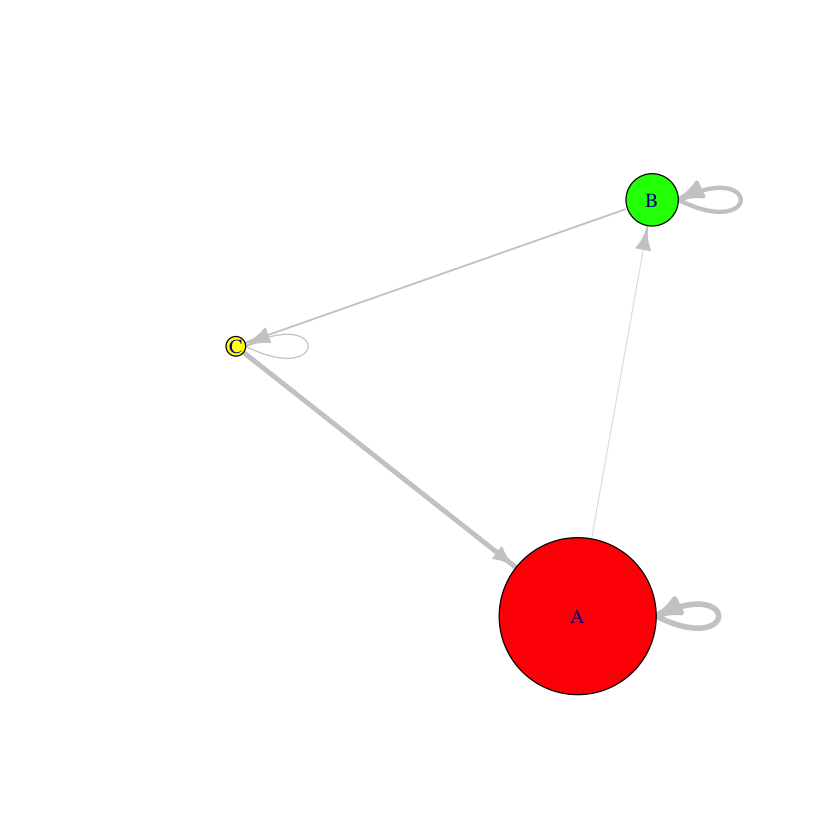

In [17]:
plot(g, edge.width=E(g.el)$weight*5)